<a href="https://colab.research.google.com/github/GuruurajD/AI4ICPS-Learning/blob/main/SVM_KNN_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning the SVM , NaiveBayes and KNN etc -Supervised machine learning.  
By SM -

In [1]:
# Importing required files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gives better visulation on the top of pyplot plots
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Lets access iris dataset from the below URL
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
# Assign the columns names to dataset
headers = ['sp_len','sp_wid','petal_len', 'petal_wid','class']

In [4]:
#Read the data from the path along with assignment of headers
data = pd.read_csv(path, names = headers)

#Observe the data top 5 rows
data.head()

,sp_len,sp_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#examine the data size (rows and columns)
data.shape

(150, 5)

In [6]:
#Basic preprocessing
X = data.iloc[:,:-1].values #: means all the values and -1 means ommit target variable (last column)
y = data.iloc[:,4].values # select only last column -as it is target variable

In [7]:
#Splitting the data beween training data and testing data - 70% training data and 30% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [8]:
#Perform data scaling
#data normalization = (data - mean) /standard deviation of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # calculate mean and standard deviation of the X_train

X_train = scaler.transform(X_train) #Apply transform on the training dataset using mean and sd
X_test = scaler.transform(X_test)

Naive Bays

In [9]:
# fit the navie bays model on the training data (X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)  #Fitted the Naivebayes classifier on the training data

GaussianNB()

In [10]:
#Now predict using the fitted model over the training data
y_pred = clf.predict(X_train)

In [11]:
#predict accuracy of the current model
accu = accuracy_score(y_train, y_pred)
print("Accuracy is :",accu)
#Accuracy of the model is 93 over the training data

Accuracy is : 0.9714285714285714


Given above is the accuracy of the model over training dataset - this is really good accuracy

In [12]:
#Lets now predict on testing data
y_pred = clf.predict(X_test)

[[11  0  0]
 [ 0 19  1]
 [ 0  2 12]]


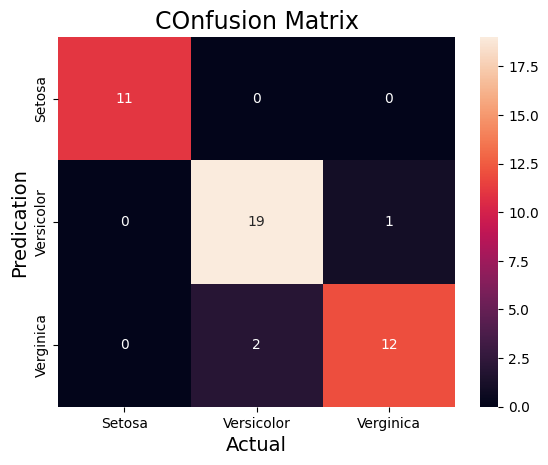

In [13]:
#Lets build the confusion matrix using the predicted data (comparison with actual data)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print(result)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels = ['Setosa','Versicolor','Verginica'],
            yticklabels = ['Setosa','Versicolor','Verginica'])
plt.ylabel('Predication',fontsize=14)
plt.xlabel('Actual',fontsize =14)
plt.title('COnfusion Matrix',fontsize=17)
plt.show()

Out of 11 Setosa, 11 have been correctly classfied, out of 20 versicolor 19 are correctly classified and out of 14 verginica 12 are correctly classified - means model has predicted all classes correctly

In [14]:
#Calculate the classification report for the predictions
res1 = classification_report(y_test,y_pred)
print("Classification report :",res1)
res2 = accuracy_score(y_test,y_pred)
print("Accuracy score: ",res2)

Classification report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.95      0.93        20
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45

Accuracy score:  0.9333333333333333


This reports shows good accuracywith the current algorithm

> Add blockquote



**Support Vector Machine (SVM)**

In [15]:
# import support vector classifier (SVC)

from sklearn.svm import SVC
max_accu = 0
max_accu_kernel = ""
accu_list =[]

#test the accuracies of the different kernels of the svc
for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC(kernel = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accu = accuracy_score(y_train,y_pred)
  accu_list.append(accu)
  print("Accuracy of ",i," Kernel is :",accu)
  if max_accu < accu:
    max_accu = accu
    max_accu_kernel = i


print("Highest accuracy is ",max_accu, "of the kernel ", max_accu_kernel)

Accuracy of  linear  Kernel is : 0.9714285714285714
Accuracy of  poly  Kernel is : 0.9523809523809523
Accuracy of  rbf  Kernel is : 0.9904761904761905
Accuracy of  sigmoid  Kernel is : 0.9428571428571428
Highest accuracy is  0.9904761904761905 of the kernel  rbf


Above segment calculates the accuracy of the each kernel and identifies which kernel yields highest accuracy score

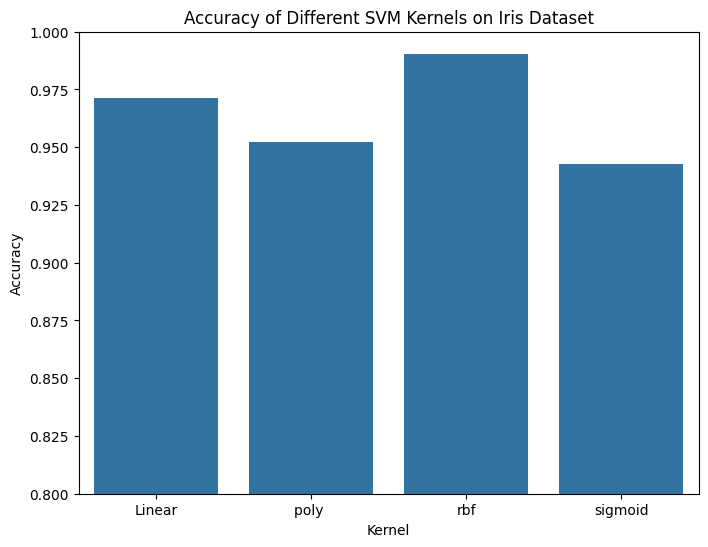

In [16]:
#Store the labels of kernel and its corrosponding accuracy values
accuracies = {'Linear':accu_list[0],'poly ':accu_list[1],'rbf':accu_list[2],'sigmoid':accu_list[3]}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0) #Set y-axis limits for better visualization
plt.show()